In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [24]:
EV = pd.read_csv('EV charging data.csv')

In [25]:
EV = EV.rename(columns = EV.iloc[0]).loc[1:]
EV.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
1,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10,0.3,0.05,Dec,Friday,late morning (9-12),Less than 3 hours
2,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10,0.87,0.136666667,Dec,Friday,late morning (9-12),Less than 3 hours
3,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19,29.87,8.216388889,Dec,Friday,late morning (9-12),Between 6 and 9 hours
4,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16,15.56,24.41972222,Dec,Saturday,late afternoon (15-18),More than 18 hours
5,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23,3.62,0.970555556,Dec,Monday,late evening (21-midnight),Less than 3 hours


In [26]:
d_month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
EV['month_plugin'] = EV['month_plugin'].map(d_month)


In [27]:
EV

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
1,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10,0.3,0.05,12,Friday,late morning (9-12),Less than 3 hours
2,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10,0.87,0.136666667,12,Friday,late morning (9-12),Less than 3 hours
3,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19,29.87,8.216388889,12,Friday,late morning (9-12),Between 6 and 9 hours
4,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16,15.56,24.41972222,12,Saturday,late afternoon (15-18),More than 18 hours
5,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23,3.62,0.970555556,12,Monday,late evening (21-midnight),Less than 3 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,6874,UT15,UT15-2,Private,NaN,31.01.2020 17:57,17,31.01.2020 22:29,22,13.43,4.53,1,Friday,late afternoon (15-18),Between 3 and 6 hours
6875,6875,AsO10,AsO10-1,Private,NaN,31.01.2020 18:32,18,31.01.2020 21:43,21,9.1,3.182222222,1,Friday,early evening (18-21),Between 3 and 6 hours
6876,6876,Bl2,Bl2-1,Private,NaN,31.01.2020 19:25,19,31.01.2020 20:37,20,4.28,1.203888889,1,Friday,early evening (18-21),Less than 3 hours
6877,6877,UT7,UT7-1,Private,NaN,31.01.2020 19:27,19,31.01.2020 19:48,19,2.31,0.3525,1,Friday,early evening (18-21),Less than 3 hours


Text(0.5, 1.0, 'average duration_hour per month')

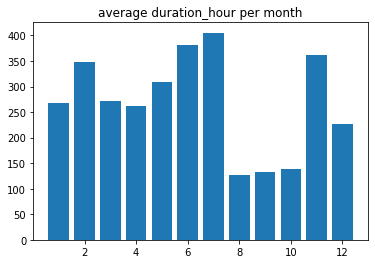

In [28]:
EV["Duration_hours"] = pd.to_numeric(EV["Duration_hours"])
EV["El_kWh"] = pd.to_numeric(EV["El_kWh"])
plt1 = EV.groupby('month_plugin').mean().reset_index()
plt.bar(plt1["month_plugin"], plt1["Duration_hours"])
plt.title('average duration_hour per month')

Text(0.5, 1.0, 'average El_kWh per month')

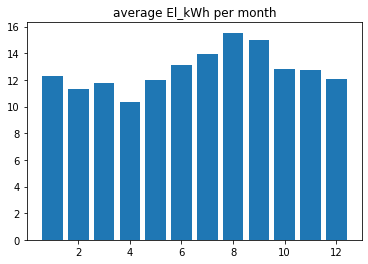

In [29]:
plt.bar(plt1["month_plugin"], plt1["El_kWh"])
plt.title('average El_kWh per month')

In [30]:
d_weekday = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
EV['weekdays_plugin'] = EV['weekdays_plugin'].map(d_weekday)

Text(0.5, 1.0, 'average duration_hour per weekday')

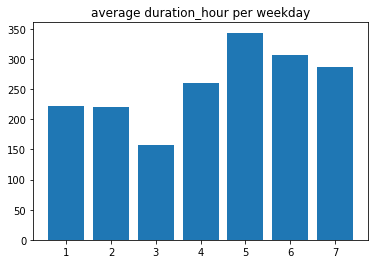

In [31]:
plt2 = EV.groupby('weekdays_plugin').mean().reset_index()
plt.bar(plt2["weekdays_plugin"], plt2["Duration_hours"])
plt.title('average duration_hour per weekday')

Text(0.5, 1.0, 'average El_kWh per month')

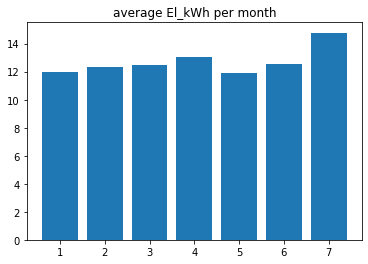

In [32]:
plt.bar(plt2["weekdays_plugin"], plt2["El_kWh"])
plt.title('average El_kWh per month')

,Plugin_category,El_kWh,Duration_hours,month_plugin,weekdays_plugin
0,early afternoon (12-15),10.468285,190.157054,7.443584,4.553097
1,early evening (18-21),14.347054,297.610910,7.296256,3.768313
2,early morning (6-9),14.831285,341.458043,7.223464,3.871508
3,early night (midnight-3),17.086707,358.564087,6.688623,4.838323
4,late afternoon (15-18),11.514274,228.000572,7.308344,3.870817
5,late evening (21-midnight),14.265270,308.133430,7.175676,3.778958
6,late morning (9-12),10.255324,164.626251,8.053521,4.140845
7,late night (3-6),14.405758,9.559150,6.787879,5.000000


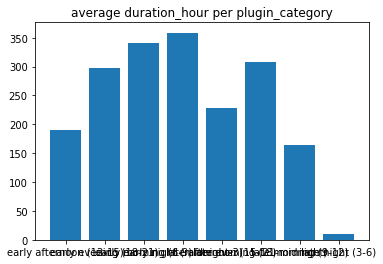

In [33]:
plt3 = EV.groupby('Plugin_category').mean().reset_index()
plt.bar(plt3["Plugin_category"], plt3["Duration_hours"])
plt.title('average duration_hour per plugin_category')
plt3

Text(0.5, 1.0, 'average El_kWh per plugin_category')

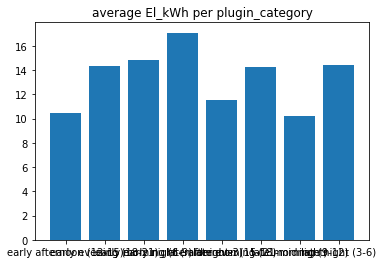

In [34]:
plt.bar(plt3["Plugin_category"], plt3["El_kWh"])
plt.title('average El_kWh per plugin_category')

# Month June to September

In [35]:
summer = EV.loc[(EV['month_plugin'] >= 6) & (EV['month_plugin'] <= 9)]
summer.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
1151,1151,Bl2,Bl2-5,Private,NaN,01.06.2019 11:45,11,01.06.2019 11:51,11,0.32,0.096111,6,6,late morning (9-12),Less than 3 hours
1152,1152,Bl2,Bl2-5,Private,NaN,01.06.2019 12:22,12,01.06.2019 18:55,18,7.32,6.562500,6,6,early afternoon (12-15),Between 6 and 9 hours
1153,1153,UT9,Share-14,Shared,Shared-12,01.06.2019 21:41,21,02.06.2019 03:46,3,32.66,6.078333,6,6,late evening (21-midnight),Between 6 and 9 hours
1154,1154,Bl2,Bl2-5,Private,NaN,01.06.2019 21:45,21,02.06.2019 10:12,10,4.32,12.445833,6,6,late evening (21-midnight),Between 12 and 15 hours
1155,1155,AdO1,AdO1-2,Private,NaN,01.06.2019 23:14,23,02.06.2019 18:34,18,12.99,19.325278,6,6,late evening (21-midnight),More than 18 hours


In [36]:
early_night = summer.loc[summer['Plugin_category'] == 'early night (midnight-3)']
late_night = summer.loc[summer['Plugin_category'] == 'late night (3-6)']
early_morning = summer.loc[summer['Plugin_category'] == 'early morning (6-9)']
late_morning = summer.loc[summer['Plugin_category'] == 'late morning (9-12)']
early_afternoon = summer.loc[summer['Plugin_category'] == 'early afternoon (12-15)']
late_afternoon = summer.loc[summer['Plugin_category'] == 'late afternoon (15-18)']
early_evening = summer.loc[summer['Plugin_category'] == 'early evening (18-21)']
late_evening = summer.loc[summer['Plugin_category'] == 'late evening (21-midnight)']

17.91216216216216
12.861199212950368


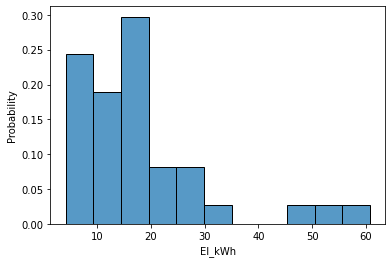

In [37]:
sns.histplot(early_night['El_kWh'], stat = 'probability')
print(early_night['El_kWh'].mean())
print(early_night['El_kWh'].std())

11.315
5.566429992117286


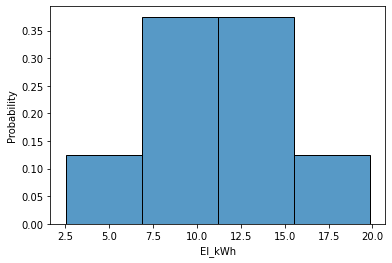

In [38]:
sns.histplot(late_night['El_kWh'], stat = 'probability')
print(late_night['El_kWh'].mean())
print(late_night['El_kWh'].std())

16.792444444444445
10.688528293020845


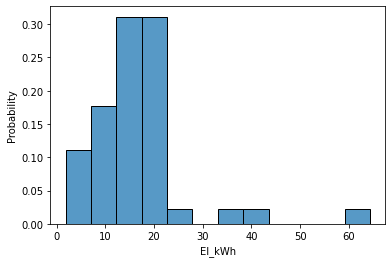

In [39]:
sns.histplot(early_morning['El_kWh'], stat = 'probability')
print(early_morning['El_kWh'].mean())
print(early_morning['El_kWh'].std())

In [42]:
len(early_morning['El_kWh'])

45

11.056593406593406
9.167442902864973


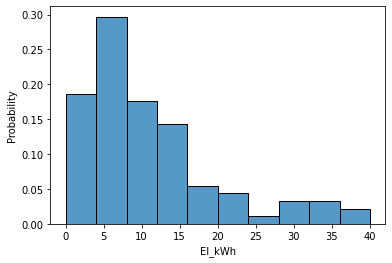

In [40]:
sns.histplot(late_morning['El_kWh'], stat = 'probability')
print(late_morning['El_kWh'].mean())
print(late_morning['El_kWh'].std())

10.472366863905325
8.983940384975861


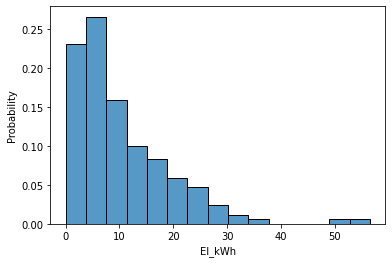

In [19]:
sns.histplot(early_afternoon['El_kWh'], stat = 'probability')
print(early_afternoon['El_kWh'].mean())
print(early_afternoon['El_kWh'].std())

13.256301369863014
11.639091435620127


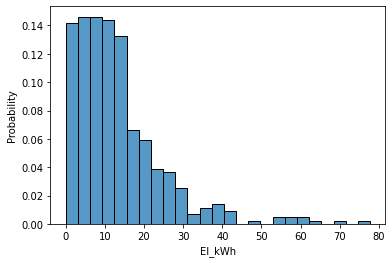

In [20]:
sns.histplot(late_afternoon['El_kWh'], stat = 'probability')
print(late_afternoon['El_kWh'].mean())
print(late_afternoon['El_kWh'].std())

17.712700534759357
15.307718844636323


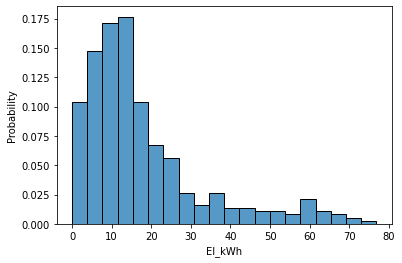

In [21]:
sns.histplot(early_evening['El_kWh'], stat = 'probability')
print(early_evening['El_kWh'].mean())
print(early_evening['El_kWh'].std())

15.485608695652171
12.687597710129076


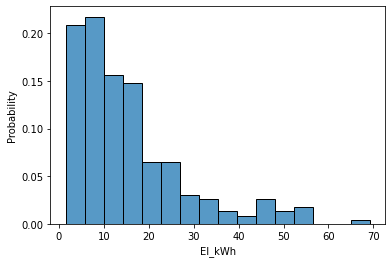

In [22]:
sns.histplot(late_evening['El_kWh'], stat = 'probability')
print(late_evening['El_kWh'].mean())
print(late_evening['El_kWh'].std())